# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#cities

636


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print("Beginning of Data Retrieval")
print("-----------------------------------")

batch_size = 50   
num = 1
#index1 = 0
for i in range(0, len(cities)+1, batch_size):
    
    
    cities_list = cities[i:i+batch_size]
    
    
#    print(cities_list)

    for index, city in enumerate(cities_list):
    
 #    for index, city in enumerate(cities_list):
        
        try:
            response = requests.get(query_url + city).json()
#            print(response)
        
            print(f"Processed Record {index} of set {num} of |{city}")
            
            Cloudiness.append(response['clouds']['all'])
            Country.append(response['sys']['country'])
            Date.append(response['dt'])
            Humidity.append(response['main']['humidity'])
            Lat.append(response['coord']['lat'])
            Lng.append(response['coord']['lon'])
            Max_Temp.append(response['main']['temp_max'])
            Wind_Speed.append(response['wind']['speed'])
            #print(index)
        except:
            
            print("City not found.Skipping....")
            Cloudiness.append(None)
            Country.append(None)
            Date.append(None)
            Humidity.append(None)
            Lat.append(None)
            Lng.append(None)
            Max_Temp.append(None)
            Wind_Speed.append(None)
    #index = index + 1
    num += 1
   
    
#    display(response)
#    break
    


Beginning of Data Retrieval
-----------------------------------
Processed Record 0 of set 1 of |saint-philippe
Processed Record 1 of set 1 of |sola
Processed Record 2 of set 1 of |puerto escondido
Processed Record 3 of set 1 of |yumen
Processed Record 4 of set 1 of |koygorodok
Processed Record 5 of set 1 of |busselton
Processed Record 6 of set 1 of |husavik
Processed Record 7 of set 1 of |rikitea
Processed Record 8 of set 1 of |ushuaia
Processed Record 9 of set 1 of |tuktoyaktuk
Processed Record 10 of set 1 of |arraial do cabo
Processed Record 11 of set 1 of |waltershausen
Processed Record 12 of set 1 of |avarua
Processed Record 13 of set 1 of |brits
Processed Record 14 of set 1 of |vestmannaeyjar
Processed Record 15 of set 1 of |vila franca do campo
Processed Record 16 of set 1 of |barrow
Processed Record 17 of set 1 of |severo-kurilsk
Processed Record 18 of set 1 of |coquimbo
Processed Record 19 of set 1 of |kapaa
Processed Record 20 of set 1 of |punta arenas
Processed Record 21 of s

Processed Record 33 of set 4 of |nikolskoye
Processed Record 34 of set 4 of |pevek
Processed Record 35 of set 4 of |fortuna
Processed Record 36 of set 4 of |hasaki
Processed Record 37 of set 4 of |bathsheba
Processed Record 38 of set 4 of |torrijos
Processed Record 39 of set 4 of |attawapiskat
City not found.Skipping....
Processed Record 40 of set 4 of |haapiti
Processed Record 41 of set 4 of |hervey bay
Processed Record 42 of set 4 of |eyl
Processed Record 43 of set 4 of |broken hill
Processed Record 44 of set 4 of |saint george
Processed Record 45 of set 4 of |lovozero
Processed Record 46 of set 4 of |bulgan
Processed Record 47 of set 4 of |ahipara
Processed Record 48 of set 4 of |porto de moz
Processed Record 49 of set 4 of |ekhabi
Processed Record 0 of set 5 of |komsomolskiy
Processed Record 1 of set 5 of |pisco
Processed Record 2 of set 5 of |dvinskoy
Processed Record 3 of set 5 of |port augusta
Processed Record 4 of set 5 of |camana
Processed Record 5 of set 5 of |nantucket
Proce

Processed Record 21 of set 8 of |esperance
Processed Record 22 of set 8 of |jiddah
City not found.Skipping....
Processed Record 23 of set 8 of |lakes entrance
Processed Record 24 of set 8 of |henties bay
Processed Record 25 of set 8 of |herat
Processed Record 26 of set 8 of |kristiinankaupunki
Processed Record 27 of set 8 of |abu samrah
Processed Record 28 of set 8 of |svetlaya
Processed Record 29 of set 8 of |palabuhanratu
City not found.Skipping....
Processed Record 30 of set 8 of |belaya kholunitsa
Processed Record 31 of set 8 of |necochea
Processed Record 32 of set 8 of |mogadishu
Processed Record 33 of set 8 of |killybegs
Processed Record 34 of set 8 of |rawson
Processed Record 35 of set 8 of |chico
Processed Record 36 of set 8 of |samarai
Processed Record 37 of set 8 of |chapais
Processed Record 38 of set 8 of |tumannyy
City not found.Skipping....
Processed Record 39 of set 8 of |okhotsk
Processed Record 40 of set 8 of |lagos
Processed Record 41 of set 8 of |pak thong chai
Proces

Processed Record 5 of set 12 of |baykit
Processed Record 6 of set 12 of |bilasipara
Processed Record 7 of set 12 of |pangnirtung
Processed Record 8 of set 12 of |asuncion mita
Processed Record 9 of set 12 of |hashtrud
Processed Record 10 of set 12 of |gulf gate estates
Processed Record 11 of set 12 of |morehead
Processed Record 12 of set 12 of |mangan
Processed Record 13 of set 12 of |sibolga
Processed Record 14 of set 12 of |ciudad bolivar
Processed Record 15 of set 12 of |ayagoz
Processed Record 16 of set 12 of |tual
Processed Record 17 of set 12 of |port blair
Processed Record 18 of set 12 of |atasu
Processed Record 19 of set 12 of |grajau
Processed Record 20 of set 12 of |aguimes
Processed Record 21 of set 12 of |itamaraca
Processed Record 22 of set 12 of |verkhoyansk
Processed Record 23 of set 12 of |callaguip
Processed Record 24 of set 12 of |dabuleni
Processed Record 25 of set 12 of |oyama
Processed Record 26 of set 12 of |aksha
Processed Record 27 of set 12 of |soe
Processed Re

In [6]:
cities_df1 = pd.DataFrame(cities)
cities_df1 = cities_df1.rename(columns = {0:'City'})
cities_df1['Cloudiness'] = ""
cities_df1['Country'] = ""
cities_df1['Date'] = ""
cities_df1['Humidity'] = ""
cities_df1['Lat'] = ""
cities_df1['Lng']= ""
cities_df1['Max Temp'] = ""
cities_df1['Wind Speed'] = ""

cities_df1['Cloudiness']= Cloudiness
cities_df1['Country'] = Country
cities_df1['Date'] = Date
cities_df1['Humidity'] = Humidity
cities_df1['Lat'] = Lat
cities_df1['Lng'] = Lng
cities_df1['Max_Temp'] = Max_Temp
cities_df1[' Wind_Speed'] =  Wind_Speed
#len(cities_df['Country'])
#len(Wind_Speed)

In [9]:

cities_df1= cities_df1.dropna(how = 'any', axis = 0)
#cities_df1.count()
#cities_df1= cities_df1.reset_index(drop = True)
cities_df1.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Max_Temp,Wind_Speed
0,saint-philippe,100.0,RE,1.583204e+09,88.0,-21.36,55.77,,,78.80,4.70
1,sola,100.0,VU,1.583204e+09,78.0,-13.88,167.55,,,83.55,12.44
2,puerto escondido,5.0,MX,1.583204e+09,74.0,15.85,-97.07,,,80.60,6.93
3,yumen,0.0,CN,1.583204e+09,21.0,40.28,97.20,,,41.27,14.32
4,koygorodok,100.0,RU,1.583204e+09,98.0,60.45,51.00,,,33.17,9.48


In [10]:
cities_df1.to_csv("../OutPut/cities_result.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
date_time =cities_df1['Date'][0]

date_year = time.strftime('%m/%d/%Y', time.gmtime(date_time))
date_year

'03/03/2020'

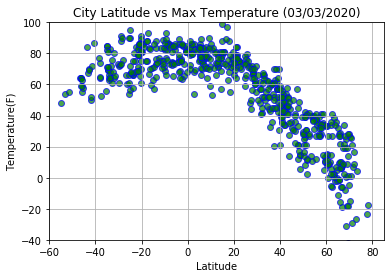

In [12]:
Temperature= cities_df1['Max_Temp']
Latitude = cities_df1['Lat']
plt.scatter(Latitude,Temperature,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)
plt.xlim(-60,85)
plt.ylim(-40,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title(f"City Latitude vs Max Temperature ({date_year})")
plt.grid()
plt.savefig("../OutPut/Fig1_Lat_Temp.png")

#### Latitude vs. Humidity Plot

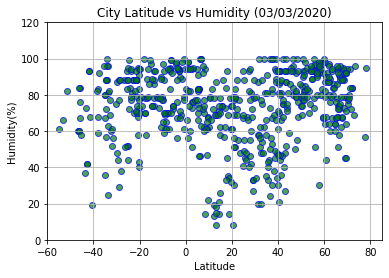

In [13]:
Humidity1 = cities_df1['Humidity']

plt.scatter(Latitude,Humidity1,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)
plt.xlim(-60,85)
plt.ylim(0,120)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs Humidity ({date_year})")
plt.grid()
plt.savefig("../OutPut/Fig2_Lat_Humidity.png")

#### Latitude vs. Cloudiness Plot

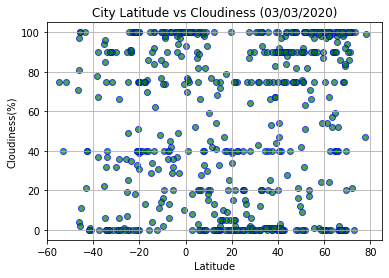

In [14]:
Cloudiness1 = cities_df1['Cloudiness']
plt.scatter(Latitude,Cloudiness1,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)
plt.xlim(-60,85)
plt.ylim(-5,105)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness ({date_year})")
plt.grid()
plt.savefig("../OutPut/Fig3_Lat_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

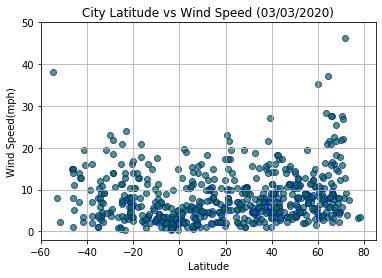

In [15]:
cities_df1.columns = cities_df1.columns.str.strip()
wind_speed1 = cities_df1['Wind_Speed']
plt.scatter(Latitude,wind_speed1,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)
plt.xlim(-60,85)
plt.ylim(-2,50)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs Wind Speed ({date_year})")
plt.grid()
plt.savefig("../OutPut/Fig4_Lat_WindSpeed.png")
#cities_df1['Wind_Speed']

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = cities_df1[cities_df1['Lat'] >= 0]
south_hem = cities_df1[cities_df1['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8002359562738635


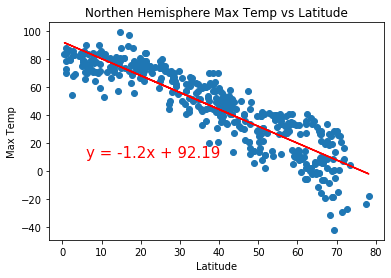

In [18]:
north_hem_temp = north_hem['Max_Temp']
north_hem_lat = north_hem['Lat']
slope_north, intercept_north,rvalue_north, pvalue_north,stderr_north = linregress(north_hem_lat,north_hem_temp)
north_fit = north_hem_lat * slope_north + intercept_north
line_eq = "y = " + str(round(slope_north,2)) + "x + " + str(round(intercept_north,2))
plt.scatter(north_hem_lat,north_hem_temp)
plt.plot(north_hem_lat,north_fit,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northen Hemisphere Max Temp vs Latitude")
plt.savefig("../OutPut/Fig5_north_hem_lat_temp.png")
print(f"The r-squared is : {rvalue_north**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-squared is : 0.19843206046979214


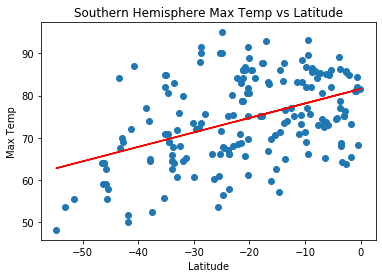

In [19]:
south_hem_temp = south_hem['Max_Temp']
south_hem_lat = south_hem['Lat']
slope_south, intercept_south,rvalue_south, pvalue_south,stderr_south = linregress(south_hem_lat,south_hem_temp)
south_fit = south_hem_lat * slope_south + intercept_south
line_eq = "y = " + str(round(slope_south,2)) + "x + " + str(round(intercept_south,2))
plt.scatter(south_hem_lat,south_hem_temp)
plt.plot(south_hem_lat,south_fit,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere Max Temp vs Latitude")
plt.savefig("../OutPut/Fig6_south_hem_lat_temp.png")
print(f"The r-squared is : {rvalue_south**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.08393947634957218


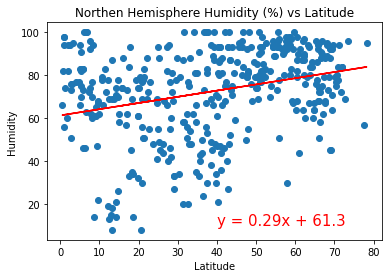

In [21]:
north_hem_humidity = north_hem['Humidity']

slope_north1, intercept_north1,rvalue_north1, pvalue_north1,stderr_north1 = linregress(north_hem_lat,north_hem_humidity)
north_fit1 = north_hem_lat * slope_north1 + intercept_north1
line_eq = "y = " + str(round(slope_north1,2)) + "x + " + str(round(intercept_north1,2))
plt.scatter(north_hem_lat,north_hem_humidity)
plt.plot(north_hem_lat,north_fit1,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northen Hemisphere Humidity (%) vs Latitude")
plt.savefig("../OutPut/Fig7_north_hem_lat_humidity.png")
print(f"The r-squared is : {rvalue_north1**2}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09329523268551622


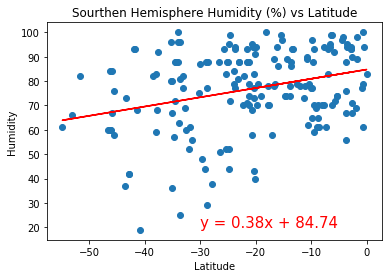

In [22]:
south_hem_humidity = south_hem['Humidity']

slope_south1, intercept_south1,rvalue_south1, pvalue_south1,stderr_south1 = linregress(south_hem_lat,south_hem_humidity)
south_fit1 = south_hem_lat * slope_south1 + intercept_south1
line_eq = "y = " + str(round(slope_south1,2)) + "x + " + str(round(intercept_south1,2))
plt.scatter(south_hem_lat,south_hem_humidity)
plt.plot(south_hem_lat,south_fit1,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Sourthen Hemisphere Humidity (%) vs Latitude")
plt.savefig("../OutPut/Fig8_south_hem_lat_humidity.png")
print(f"The r-squared is : {rvalue_south1**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.06010998656101792


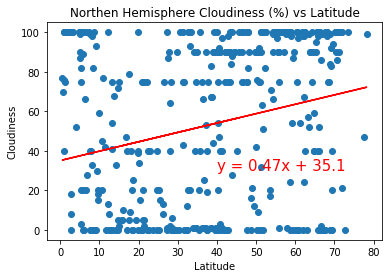

In [23]:
north_hem_cloud = north_hem['Cloudiness']
slope_north2, intercept_north2,rvalue_north2, pvalue_north2,stderr_north2 = linregress(north_hem_lat,north_hem_cloud)
north_fit2 = north_hem_lat * slope_north2 + intercept_north2
line_eq = "y = " + str(round(slope_north2,2)) + "x + " + str(round(intercept_north2,2))
plt.scatter(north_hem_lat,north_hem_cloud)
plt.plot(north_hem_lat,north_fit2,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northen Hemisphere Cloudiness (%) vs Latitude")
plt.savefig("../OutPut/Fig9_north_hem_lat_cloud.png")
print(f"The r-squared is : {rvalue_north2**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07509641000645495


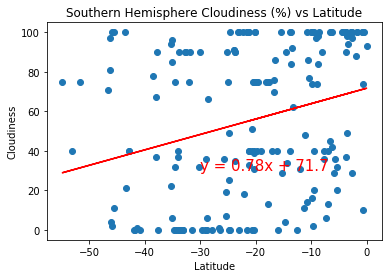

In [24]:
south_hem_cloud = south_hem['Cloudiness']
slope_south2, intercept_south2,rvalue_south2, pvalue_south2,stderr_south2 = linregress(south_hem_lat,south_hem_cloud)
south_fit2 = south_hem_lat * slope_south2 + intercept_south2
line_eq = "y = " + str(round(slope_south2,2)) + "x + " + str(round(intercept_south2,2))
plt.scatter(south_hem_lat,south_hem_cloud)
plt.plot(south_hem_lat,south_fit2,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Cloudiness (%) vs Latitude")
plt.savefig("../OutPut/Fig10_south_hem_lat_cloud.png")
print(f"The r-squared is : {rvalue_south2**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.05724611955828493


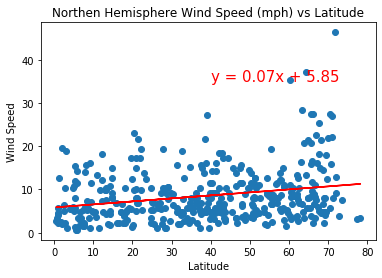

In [25]:
north_hem_wind = north_hem['Wind_Speed']
slope_north3, intercept_north3,rvalue_north3, pvalue_north3,stderr_north3 = linregress(north_hem_lat,north_hem_wind)
north_fit3 = north_hem_lat * slope_north3 + intercept_north3
line_eq = "y = " + str(round(slope_north3,2)) + "x + " + str(round(intercept_north3,2))
plt.scatter(north_hem_lat,north_hem_wind)
plt.plot(north_hem_lat,north_fit3,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northen Hemisphere Wind Speed (mph) vs Latitude")
plt.savefig("../OutPut/Fig11_north_hem_lat_wind.png")
print(f"The r-squared is : {rvalue_north3**2}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.05724611955828493


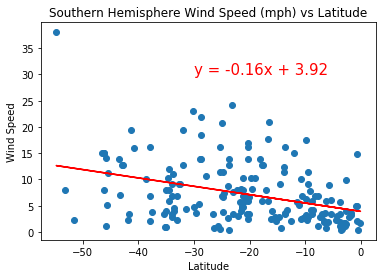

In [26]:
south_hem_wind = south_hem['Wind_Speed']
slope_south3, intercept_south3,rvalue_south3, pvalue_south3,stderr_south3 = linregress(south_hem_lat,south_hem_wind)
south_fit3 = south_hem_lat * slope_south3 + intercept_south3
line_eq = "y = " + str(round(slope_south3,2)) + "x + " + str(round(intercept_south3,2))
plt.scatter(south_hem_lat,south_hem_wind)
plt.plot(south_hem_lat,south_fit3,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere Wind Speed (mph) vs Latitude")
plt.savefig("../OutPut/Fig12_south_hem_lat_wind.png")
print(f"The r-squared is : {rvalue_north3**2}")
